In [7]:
import scipy as scp
import numpy as np

In [8]:
import sys

In [35]:
class HelioConverter():
    def __init__(self, cenX, cenY, rad, R, ϕ, θ):
        self.cut = None
        self.cenX = cenX
        self.cenY = cenY
        self.dist_top = cenY - rad
        self.rad = rad
        self.R = R
        self.ϕ = ϕ
        self.θ = θ
    
    def HEEQ_to_point_sat_matrix(ϕ, θ):
        return np.array([
            [np.cos(ϕ)*np.cos(θ), np.sin(ϕ)*np.cos(θ), np.sin(θ)],
            [np.sin(ϕ), np.cos(ϕ), 0],
            [-np.cos(ϕ)*np.sin(θ), -np.sin(ϕ)*np.sin(θ), np.sin(θ)]
        ])
    
    def point_sat_to_HEEQ_matrix(ϕ, θ):
        return np.array([
            [np.cos(ϕ)*np.cos(θ), - np.sin(ϕ), - np.cos(θ)*np.sin(θ)],
            [np.sin(ϕ)*np.cos(θ), np.cos(ϕ), - np.sin(ϕ)*np.sin(θ)],
            [np.sin(θ), + np.cos(θ), 0]
        ])
    
    def HEEQ_to_point_sat(p):
        return self.HEEQ_to_point_sat_matrix(self.ϕ, self.θ)*p
    
    def point_sat_to_HEEQ(p):
        return self.point_sat_to_HEEQ_matrix(self.ϕ, self.θ)*p
    
    def to_HEEQ(X1):
        return np.array([X1*np.cos(self.ϕ)*np.cos(self.Θ), X1*np.sin(self.ϕ)*np.cos(self.θ), X1*np.sin(self.θ)])
    
    def rad_circle(i):
        return self.cut[i]
    
    def nanleft(i):
        return self.cenX - self.cut[i]
    
    def set_rad_parallel_cut(rad):
        self.cut = np.zeros((2*rad+1,1))
        self.cut[:rad] = np.fix(np.sqrt(rad**2-(rad-np.array(list(range(rad)))+1)**2))
        self.cut[rad+1:] = reversed(self.cut[:rad])
    
    def coord_real_to_pixel(Y,Z):
        i=int(self.rad + self.dist_top - np.fix(Z*self.rad/self.R))
        j=int(np.fix(self.nanleft(i-self.dist_top)+self.rad_circle(i-self.dist_top)+Y*self.rad/self.R))
        return i,j
    
    def pixel_to_real(i,j):
        Y=(j-self.nanleft(i-self.dist_top)-self.rad_circle(i-self.dist_top))*(self.R/self.rad);  
        Z=(-(i-self.rad-self.dist_top))*(self.R/self.rad);           
        X=np.sqrt(self.R^2-Y^2-Z^2);
        return np.array([X,Y,Z]);
    

In [12]:
A = np.loadtxt("20071207_A_Dif_0435_0415.txt")

In [13]:
B = np.loadtxt("20071207_B_Dif_0435_0415.txt")

In [19]:
A[A==0]=np.nan

In [23]:
B[B==0]=np.nan

In [24]:
import matplotlib.pyplot as plt

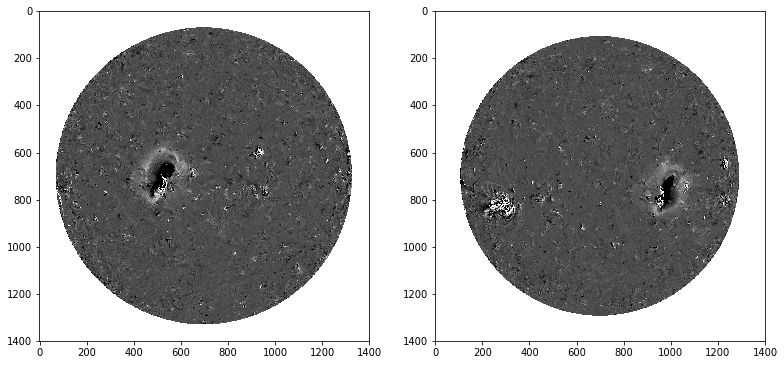

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,7))

ax1.imshow(A,vmin=-30,vmax=70)
ax2.imshow(B,vmin=-30,vmax=70)

In [34]:
cA = np.array([650,520])

In [36]:
HCA = HelioConverter(700,700,630,701407,20.620/180*np.pi,-2.535/180*np.pi)
HCB = HelioConverter(700,700,593,701407,-21.424/180*np.pi,3.089/180*np.pi)